### Project Description:

The main goal of the assignment is to perform topic modeling on a dataset of news articles and cluster them into different topics. 

This kind of analysis can be helpful for various purposes, such as understanding public senses, determining significant events, and organizing news articles navigation based on them.

In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import yaml 

#### load & prepare data

For the beginign, I loaded data and did initial investigate on them like get their shape and the type of the columns (topics). And also see the sample of it. This will help to see if the data proper for rest of the investigation and match on the format that is expected.

In [12]:
#load the data

configPath = 'config.yaml'

# Read the yaml data from the file
with open(configPath, 'r') as file:
    configData = yaml.safe_load(file)

data = pd.read_csv(configData["World_News_path"])

data.head()

Date                                               Top1  \
0  May 01, 2018  North Korea to open its sky, South Korean medi...   
1  May 02, 2018  'What have they got to fear? ' Trump threatens...   
2  May 03, 2018  Hollywood isn’t simply churning out crummy rem...   
3  May 04, 2018  Donald Trump says London hospital is 'like a w...   
4  May 05, 2018  Missing teen’s mom implores Canada to take not...   

                                                Top2  \
0        The Mueller probe ain't ending anytime soon   
1  Best Garage Heater Reviews incuding electric, ...   
2  Iran's foreign minister: US has ‘consistently ...   
3  German seat on UN Security Council likely as I...   
4  William and Kate release new pictures of Princ...   

                                                Top3  \
0  BRAND NEW: 2018 – Renault Alpine A110 – Start-...   
1  Apple just fueled everyone's biggest fear abou...   
2  Rihanna covers the June 2018 problem of Vogue ...   
3   Gang Used Drone Swarm To Thwart FBI Hostage Raid   
4  MEGHANS BROTHER SENDS PRINCE HARRY A SECRET LE...   

                                                Top4  \
0  The story of the Midwestern innocent let loose...   
1  Google accused of using GDPR to impose unfair ...   
2  U.S. soldiers are secretly fighting Saudi Arab...   
3  How Many Carbs Should You Eat Per Day To Lose ...   
4  Australia: Free whooping cough vaccine will be...   

                                                Top5  \
0  Mattis tempers optimistic outlook on Afghanist...   
1  Man died accidentally after climbing behind wo...   
2  Canadian MP Bob Saroya took trip to China paid...   
3      Russian Troll Farm Goes After Mueller’s Files   
4  Shock and Thaw—Alaskan Sea Ice Just Took a Ste...   

                                                Top6  \
0  Facebook is taking on Tinder with new dating f...   
1  When the coveted Palme d’Or trophy is awarded ...   
2  2017 Best Black Friday and Cyber Monday Mattre...   
3  Israeli soldiers singing in Persian for Irania...   
4  Giuliani: Trump is 'committed to' regime chang...   

                                                Top7  \
0  OECD chief says Greece deserves debt relief af...   
1  "Borders are Illegal?" Tucker Carlson Vs Dumb ...   
2  NBC, ABC Say Trump Lawyer Michael Cohen Was No...   
3  Labor Day 2017 Sales on Memory Foam Mattresses...   
4  Pakistan: Polio eradication teams will visit d...   

                                                Top8  \
0                  Facebook to launch dating service   
1  Mark Zuckerberg says it will take 3 years to "...   
2  South Korean janitor may keep gold bars found ...   
3  How a Chinese city turned all its 16,000 buses...   
4  Aides to Donald Trump, the US president, hired...   

                                                Top9  ...  \
0  U.N. could help Myanmar gather evidence of cri...  ...   
1             The 8 Best Cooling Pillows You Can Buy  ...   
2  Last chance: UN warns Cambodia over failing de...  ...   
3  Jamie Acourt arrested in Spain over suspected ...  ...   
4  Donald Trump’s NRA speech causes anger in U.K....  ...   

                                               Top16  \
0                              Iran's Nuclear Threat   
1  Palestinians said set to withdraw recognition ...   
2  The world’s last male northern white rhino has...   
3  2013 Cadillac CTS Luxury Walkaround, Start up,...   
4  Ontario PC Chief Doug Ford says former party m...   

                                               Top17  \
0  Jean 'Binta' Breeze Performance At Dis Poem: W...   
1  Half the Australian businesses that got a tax ...   
2  Uruguay's soybean crop forecasted to drop 43% ...   
3  UK Local elections: 4,000 people turned away f...   
4  White supremacist Patrick Little is top challe...   

                                               Top18  \
0  Migrant says he ‘accidentally’ raped a Belgian...   
1                 Ideas To Make College Work For You   
2  We Now Have A Worki

In [13]:
print(data.shape)

print(data.dtypes)

(1859, 26)
Date     object
Top1     object
Top2     object
Top3     object
Top4     object
Top5     object
Top6     object
Top7     object
Top8     object
Top9     object
Top10    object
Top11    object
Top12    object
Top13    object
Top14    object
Top15    object
Top16    object
Top17    object
Top18    object
Top19    object
Top20    object
Top21    object
Top22    object
Top23    object
Top24    object
Top25    object
dtype: object


Based on the above results, the first column will not included in the rest of the assignmet, because it shows the date of topics and it is not important in the aim of this assignment.

##### Preprocessing data

The text data from the columns "Top1" to "Top25" is extracted and then cleaned using the clean_text function. The text cleaning involves removing unwanted characters and converting all text to lowercase. By this function texts are made more similar in format and model can better recognize the different context.

In [14]:
# Extract text from columns
text_data = data.loc[:, "Top1":"Top25"].values.flatten().tolist()

print(text_data)

['North Korea to open its sky, South Korean media reports.', "The Mueller probe ain't ending anytime soon", 'BRAND NEW: 2018 – Renault Alpine A110 – Start-UP &amp; Loud Sound!', 'The story of the Midwestern innocent let loose in the big city has been a trope in successful comedies from “Tales of the City” (1993) to “Girls” (2012). “Sweetbitter,” a new, six-episode series on Starz, takes another naif, doe-eyed Tess (Ella Purnell), and sets her loose in the New York City of', 'Mattis tempers optimistic outlook on Afghanistan after twin bombings', 'Facebook is taking on Tinder with new dating features', "OECD chief says Greece deserves debt relief after 'enormous' reform effort", 'Facebook to launch dating service', 'U.N. could help Myanmar gather evidence of crimes against Rohingya: British envoy', "PTSD veterans 'cured' with ecstasy treatment in weeks, say scientists", 'May Day protesters demand better rights for workers', 'China’s Social Credit System Punishes Low-Score Parents by Limi

In [15]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Remove unwanted characters
    text = re.sub(r"\s{2,}", " ", text)  # Remove more than 2 space
    text = text.strip() #remove any space in the first or last part of text
    text = text.lower() # Convert to lowercase
    
    return text


In [16]:
cleaned_text = [clean_text(text) if isinstance(text, str) else "" for text in text_data]

cleaned_text

['north korea to open its sky south korean media reports',
 'the mueller probe ain t ending anytime soon',
 'brand new renault alpine a start up amp loud sound',
 'the story of the midwestern innocent let loose in the big city has been a trope in successful comedies from tales of the city to girls sweetbitter a new six episode series on starz takes another naif doe eyed tess ella purnell and sets her loose in the new york city of',
 'mattis tempers optimistic outlook on afghanistan after twin bombings',
 'facebook is taking on tinder with new dating features',
 'oecd chief says greece deserves debt relief after enormous reform effort',
 'facebook to launch dating service',
 'u n could help myanmar gather evidence of crimes against rohingya british envoy',
 'ptsd veterans cured with ecstasy treatment in weeks say scientists',
 'may day protesters demand better rights for workers',
 'china s social credit system punishes low score parents by limiting what schools their children attend',


As shown all characters except characters and 1 space between words are removed.

#### convert data to Document-Term Matrix (DTM)

In this step, cleaned text was converted into a Document-Term Matrix (DTM) using the TF-IDF vectorization technique. This matrix represents the frequency of words in each text entry.

In [17]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words="english")

# Fit and transform the text data
dtm = vectorizer.fit_transform(cleaned_text)

# Convert the DTM to a dense array
dtm_array = dtm.toarray()

dtm

<46475x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 192980 stored elements in Compressed Sparse Row format>

#### applying Non-Negative matrix factorization (NMF)

The Non-Negative Matrix Factorization (NMF) algorithm is applied to the DTM. NMF is an unsupervised machine learning algorithm commonly used for text clustering. NMF is modeling technique that decomposes the DTM into two matrices, one representing the document-topic distribution and the other representing the topic-term distribution. 

For NMF we have to set cluster amount to recognize the proper number of cluster, the elbow method is used.

In [18]:
import matplotlib.pyplot as plt

# Calculating sum of square of different numbers of clusters
wcss = []
max_cluster = 10 #max clustering based on 10
for num_cluster in range(1, max_cluster + 1):
    nmf = NMF(n_components = max_cluster, random_state = 42)
    nmf.fit(dtm.toarray())
    wcss.append(nmf.reconstruction_err_)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features,

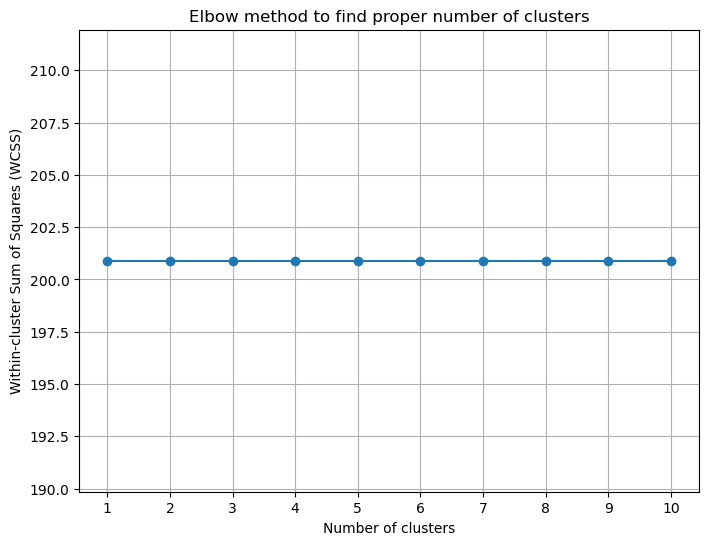

In [19]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_cluster + 1), wcss, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster Sum of Squares (WCSS)")
plt.title("Elbow method to find proper number of clusters")
plt.xticks(range(1, max_cluster + 1))
plt.grid()
plt.show()

By the above plot drived from elbow method, the result is a line with a relatively fixed slope. (the WCSS amount is between 201 and 207). As I didn't want to have more than 10 cluster, so this plot can show us: the data may not have distinct clusters in our range.

It seems it may be difficult to determine the well-defined number of clusters with the elbow Method alone. So, the silhouette is used to double check the quality of clustering in max_clustering 10

In [20]:
from sklearn.metrics import silhouette_score

max_cluster = 10
silhouette_scores = []
for num_cluster in range(2, max_cluster + 1):
    nmf = NMF(n_components = num_cluster, random_state = 42)
    nmf.fit(dtm.toarray())
    cluster_labels = nmf.transform(dtm.toarray()).argmax(axis=1)
    silhouette_scores.append(silhouette_score(dtm.toarray(), cluster_labels))

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features,

In [21]:
import numpy as np

# Finding the proper number of clusters based on highest Silhouette Score
optimal_num_clusters = np.argmax(silhouette_scores) + 2 # the 2 added because the loop is started from 2

print("Proper number of clusters:", optimal_num_clusters)

Proper number of clusters: 3


Based on the silhouette scores I picked the 3 clusters for the rest. (However, maybe other methods is exists for this aim and suggest other numbers.)

After running the NMF, the clusters and their corresponding topics are obtained. For accessing the cluster labels nmf.transform(dtm_array) is used. Each document will have a corresponding vector indicating its membership probabilities for each cluster. (It is notable that each document is assigned to one of the 3 clusters based on the highest probability in the document-topic matrix.)

In [22]:
num_clusters = 3

nmf = NMF(n_components=num_clusters, random_state=42)
nmf.fit(dtm_array)

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


NMF(n_components=3, random_state=42)

#### performing results

The result are investigated in these steps:

1. Getting the 10 top words from each cluster: the result is shown based on the importance given by NMF. 

2. Assigning documents to clusters: Assigning each document to a cluster based on the highest probability in the document-topic matrix.

3. Visualization: With t-SNE document-topic matrix is visualed in to 2D space.

In [23]:
# 1. Getting the 10 top words from each cluster
feature_names = vectorizer.get_feature_names()

num_top_words = 10  # Define the number of top words to display

# Get the top words for each topic
for i, component in enumerate(nmf.components_):
    top_words_indices = component.argsort()[:-num_top_words-1:-1]
    top_words = [feature_names[idx] for idx in top_words_indices]
    print(f"Cluster/Topic {i+1}: {', '.join(top_words)}")


Cluster/Topic 1: ukraine, russia, says, china, war, new, russian, putin, world, covid
Cluster/Topic 2: trump, donald, president, says, house, administration, coronavirus, iran, white, campaign
Cluster/Topic 3: deleted, user, twitter, facebook, video, photos, accounts, media, chinese, data


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The above result is shown 10 top word in each clusters.

In the following assign each documnet (expression/topic in the main dataset) to one the clusters based on the highest probability

In [24]:
# 2. get the document-topic matrix
doc_topic_matrix = nmf.transform(dtm_array)

# Assign documents to clusters based on the highest probability
cluster_labels = np.argmax(doc_topic_matrix, axis=1)

# Print the assigned cluster for each document
for i, cluster_label in enumerate(cluster_labels):
    print(f"Document {i+1} belongs to Cluster {cluster_label+1}")

Document 1 belongs to Cluster 1
Document 2 belongs to Cluster 2
Document 3 belongs to Cluster 1
Document 4 belongs to Cluster 1
Document 5 belongs to Cluster 1
Document 6 belongs to Cluster 1
Document 7 belongs to Cluster 1
Document 8 belongs to Cluster 1
Document 9 belongs to Cluster 1
Document 10 belongs to Cluster 1
Document 11 belongs to Cluster 1
Document 12 belongs to Cluster 1
Document 13 belongs to Cluster 1
Document 14 belongs to Cluster 2
Document 15 belongs to Cluster 1
Document 16 belongs to Cluster 1
Document 17 belongs to Cluster 1
Document 18 belongs to Cluster 1
Document 19 belongs to Cluster 1
Document 20 belongs to Cluster 2
Document 21 belongs to Cluster 2
Document 22 belongs to Cluster 1
Document 23 belongs to Cluster 2
Document 24 belongs to Cluster 1
Document 25 belongs to Cluster 1
Document 26 belongs to Cluster 2
Document 27 belongs to Cluster 1
Document 28 belongs to Cluster 1
Document 29 belongs to Cluster 1
Document 30 belongs to Cluster 1
Document 31 belongs

As the shape of topics were 1859 rows and 25 topics (with out date column as illustrated before) so we have 46475 (=25*1859) document. in the above all 46475 document are assigned to one cluster.

c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


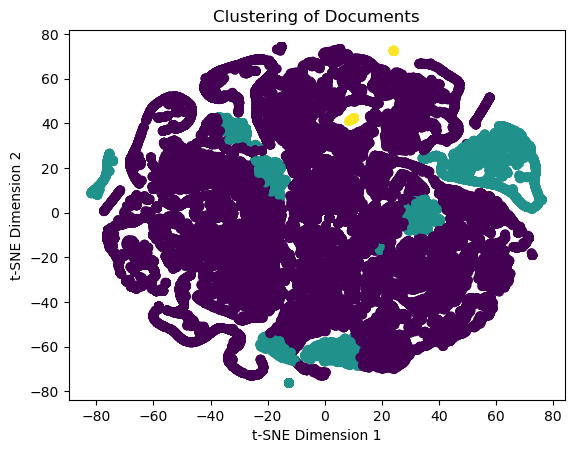

In [25]:
#Visualization with t-sne in 2D.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
doc_topic_tsne = tsne.fit_transform(doc_topic_matrix)

# Plot the clusters
plt.scatter(doc_topic_tsne[:, 0], doc_topic_tsne[:, 1], c=cluster_labels)
plt.title('Clustering of Documents')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


The 2D scatter plot displays the results of text clustering using NMF on the news headlines dataset. Each point represents a news headline, and the color of the points corresponds to their assigned cluster. Clusters appear to be closer together, suggesting higher similarity among documents in them. The clusters are not completely seprated from each other and there are some kind of noise among of them. From the above plot can be concluded that the clustering could be improved.

Also, the distrbution of documents between clusters have high difference. To be sure about this the following code is added to get the amount of documents in each cluster. (for this the cluster_labels that calculated in the "Assigning documents to clusters" is used.)

In [26]:
# Count the occurrences of each cluster label
cluster_counts = np.bincount(cluster_labels)

# Print the number of documents in each cluster
for cluster_num, doc_count in enumerate(cluster_counts):
    print(f"Cluster {cluster_num + 1}: {doc_count} documents")

Cluster 1: 40837 documents
Cluster 2: 5245 documents
Cluster 3: 393 documents


The number of documents that used in each cluster are printted in the above and it is similar with the t-sne result. (big differences in distribution. For instance the smallest cluster has 393 however bigger one has 40837 documents.)

For conclusion, data needs more analysing and investigating. Clustering news topics can be compare by other ways because by the result of this assignment there is some kind of similarity between headlines.